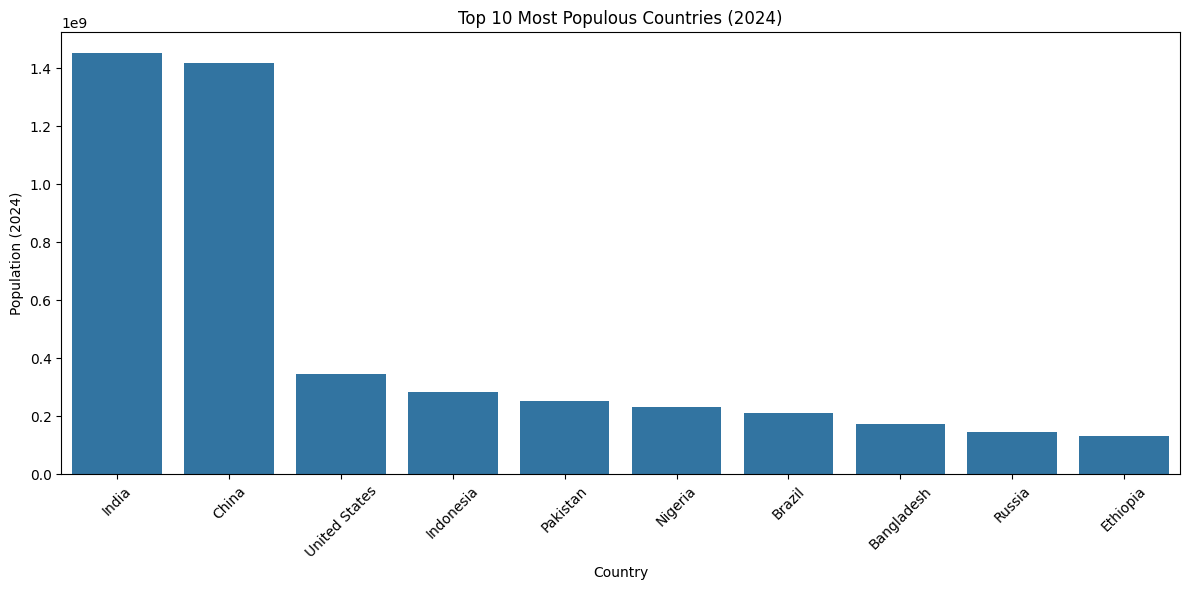

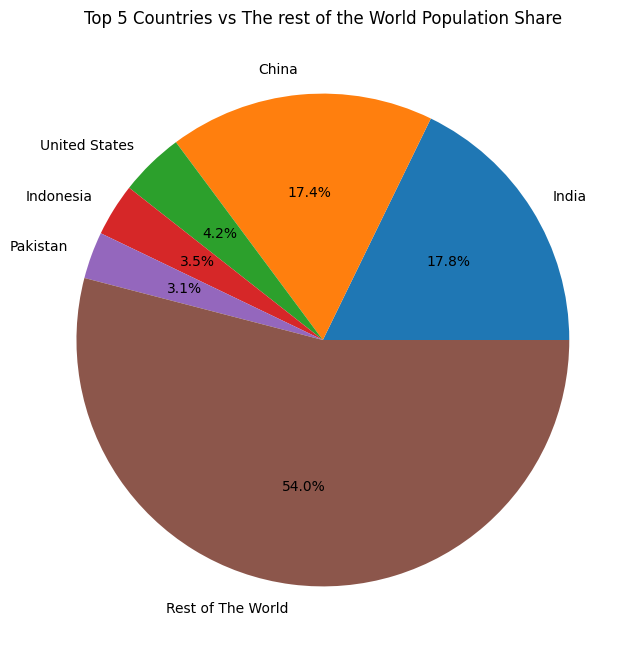

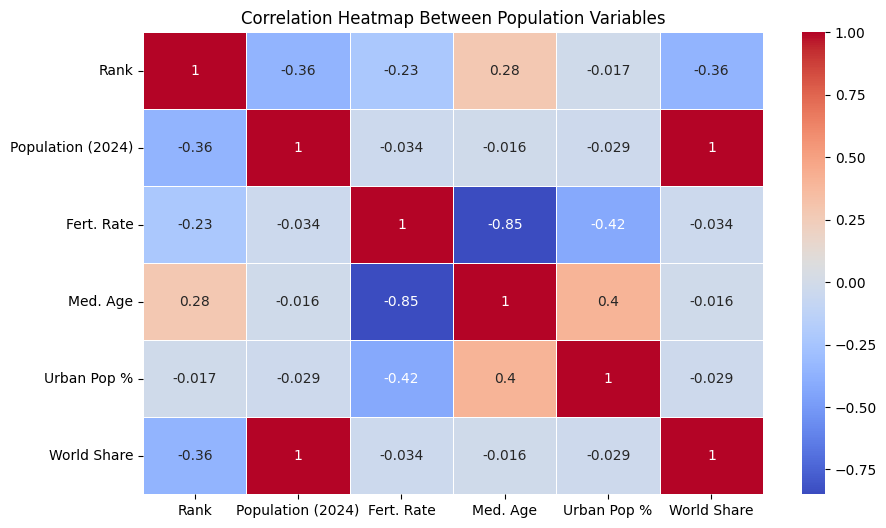

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    object 
 3   Yearly Change      234 non-null    object 
 4   Net Change         234 non-null    object 
 5   Density (P/Km²)    234 non-null    object 
 6   Land Area (Km²)    234 non-null    object 
 7   Migrants (net)     234 non-null    object 
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 22.1+ KB


,Country,Urban Pop %
217,San Marino,100.0
211,Sint Maarten,100.0
82,Belgium,99.0
191,Guam,99.0
222,Cook Islands,98.0
136,Qatar,97.0
170,Western Sahara,97.0
166,Macao,96.0
223,Nauru,95.0
34,Argentina,95.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sort and pick top 10
top10 = df.sort_values(by='Population (2024)', ascending=False).head(10)
# Create a bar chart with the top 10 populous countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Population (2024)', data=top10)
plt.title('Top 10 Most Populous Countries (2024)')
plt.xlabel('Country')
plt.ylabel('Population (2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Clean 'World Share' column
df['World Share'] = df['World Share'].str.replace('%', '', regex=True)
df['World Share'] = pd.to_numeric(df['World Share'], errors='coerce')
#Select Top 5 countries by World Share
top5_share = df.sort_values(by='World Share', ascending=False).head(5)
#Calculate the 'rest of the world'
rest_share = 100 - top5_share['World Share'].sum()
#Add "Rest of The World"
labels = top5_share['Country'].tolist() + ['Rest of The World']
sizes = top5_share['World Share'].tolist() + [rest_share]
#Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Top 5 Countries vs The rest of the World Population Share')
plt.show()
#Create an Heatmap of correlations between numeric variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Population Variables')
plt.show()
import pandas as pd
# Upload csv manually in collab
df = pd.read_csv("Wolrd Population Data.csv")
df.head()
# Basic info
df.info()
# Statistics
df.describe()
#Null values
df.isnull().sum()
df.columns
#Top 10 most populated countries
df['Population (2024)'] = df['Population (2024)'].str.replace(',', '')
df['Population (2024)'] = pd.to_numeric(df['Population (2024)'])
df.sort_values(by='Population (2024)', ascending=False).head(10)
#Top 10 coutries by fertility rate
df['Fert. Rate'] = pd.to_numeric(df['Fert. Rate'])
df.sort_values(by='Fert. Rate', ascending=False)[['Country','Fert. Rate']].head(10)
#Top 10 most urbanized countries
df['Urban Pop %'] = df['Urban Pop %'].str.replace('%', '', regex=True)
df['Urban Pop %'] =  pd.to_numeric(df['Urban Pop %'], errors='coerce')
df.sort_values(by='Urban Pop %', ascending=False)[['Country','Urban Pop %']].head(10)